In [1]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ##making a spatial plot
    spatial1 = np.zeros(n, dtype = int)
    spatial2 = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        # spatial[t] = ((sorted_counts[0][1], sorted_counts[1][1]))
        spatial1[t] = sorted_counts[0][1]
        spatial2[t] = sorted_counts[1][1]
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial1, spatial2


In [5]:
N =  6400
M = 3*N
Tmax = 500
## at the transition -- try again with the epidemic 
b = 0.22

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

times, R, spatial1, spatial2 = find_tranformation_matrix(b, E, N, Tmax, 0)

p_mix_index = np.min(np.where(R==1)[0])
t_p_mixing = times[:p_mix_index]
spatials1 = spatial1[:p_mix_index]
spatials2 = spatial2[:p_mix_index]

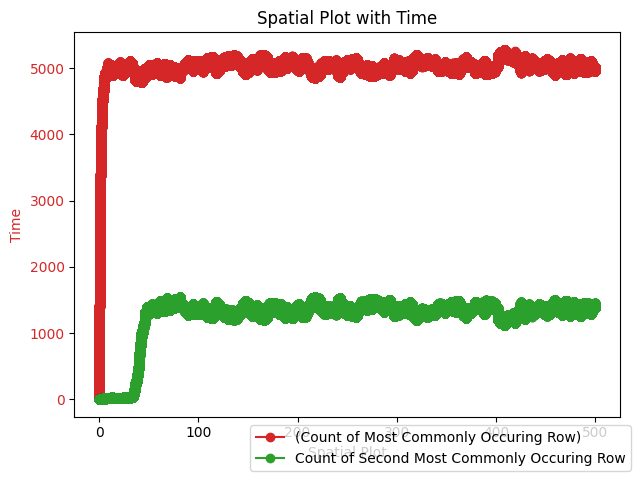

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spatial Plot')
ax1.set_ylabel('Time', color=color)
ax1.plot(times, spatial1, color=color, marker = 'o', label= '(Count of Most Commonly Occuring Row)')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:green'
ax1.plot(times, spatial2, color=color, marker = 'o', label= 'Count of Second Most Commonly Occuring Row')

fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [7]:
print(spatial2[-1])

1419


In [15]:
class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

X = [2**i for i in range(4)][::-1]

counts = Counter()
for element in X:
    counts.increment(element, 1)

counts.increment(1, 2)
counts.increment(2, 3)
counts.increment(0, 5)

print(counts)
sorted_counts = counts
## will never be the most commonly occuring element
sorted_counts[0] = -1
print(sorted_counts)
sorted_counts = sorted(sorted_counts.items(), key=lambda item: item[1], reverse=True)
print(sorted_counts)

print((sorted_counts[0][1], sorted_counts[1][1]))

# if sorted_counts[0][0] == 0:
#     ## most commonly occuring element is 0; print the second and third most commonly occuring elements
#     print((sorted_counts[1][1], sorted_counts[2][1]))
# elif sorted_counts[1][0] == 0:
#     ## second most commonly occuring element is 0; print the most and third most commonly occuring elements
#     print((sorted_counts[0][1], sorted_counts[3][1]))
# else:
#     print((sorted_counts[0][1], sorted_counts[1][1]))

{8: 1, 4: 1, 1: 3, 2: 4, 0: 5}
{8: 1, 4: 1, 1: 3, 2: 4, 0: -1}
[(2, 4), (1, 3), (8, 1), (4, 1), (0, -1)]
(4, 3)


Repeat the process above but only keep the non-zero counts.

In [23]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ##making a spatial plot
    spatial1 = np.zeros(n, dtype = int)
    spatial2 = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## make duplicate dicionary to edit
        sorted_counts = counts
        ## will never have 0 be the most commonly occuring element
        sorted_counts[0] = -1
        sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)
        ## most commonly occuring
        spatial1[t] = sorted_counts[0][1]
        ## second most commonly occuring
        spatial2[t] = sorted_counts[1][1]
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial1, spatial2


In [24]:
N =  6400
M = 3*N
Tmax = 500
## at the transition -- try again with the epidemic 
b = 0.22

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

## run all the way to extinction time
times, R, spatial1, spatial2 = find_tranformation_matrix(b, E, N, Tmax, 0)



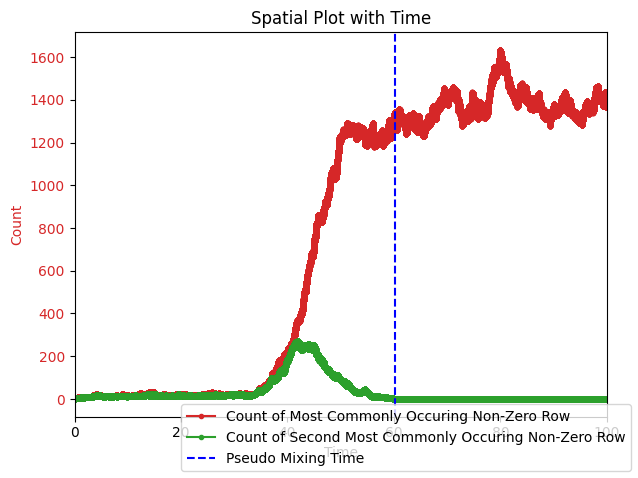

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Count', color=color)
ax1.plot(times, spatial1, color=color, marker = 'o', markersize = 3, label= 'Count of Most Commonly Occuring Non-Zero Row')
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:green'
ax1.plot(times, spatial2, color=color, marker = 'o', markersize = 3, label= 'Count of Second Most Commonly Occuring Non-Zero Row')
ax1.axvline(x=60.27, color='blue', linestyle='--', label = 'Pseudo Mixing Time')
fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Time')
plt.xlim(0, 100)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [26]:
p_mix_index = np.min(np.where(R==1)[0])
t_p_mixing = times[p_mix_index]
print(t_p_mixing)

60.27302391012401
